# Pymaceuticals Inc.
---

### Analysis

There were more mice were under the Capomulin drug regime
In addition, there was a fairly equal gender distribution, however there were more male mice than female 
Interquartile range for Ceftamin was larger than the other drug regimes which indicates that the central portions of the data mentioned are spread out further, highlighting a larger variance. 
 
 For the Capomulin treatment of mouse 1509, the tumor volume did decrease over the 40 day period how it increased in size after approxmately day 33. This also happened earlier on, around day 25, but then it reduced in size again by day 30. 
 
The data also showed positive correlation between the weight of the mice and tumor volume. Therefore, when one variable increases, so does the other. 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Checking the number of mice.
number_of_mice = len(mouse_study.groupby("Mouse ID").count())

print(f"number of mice in raw data : {number_of_mice}")

number of mice in raw data : 249


In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f"number of mice in raw data : {number_of_mice}")

duplicate_mice = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]

print(duplicate_mice)

duplicate_mice_id = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

number of mice in raw data : 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mice_id)==False]


In [83]:
# Checking the number of mice in the clean DataFrame.
print(f"number of mice in clean data : ",len(clean_mouse_data.groupby('Mouse ID').count()))
clean_mouse_data.head()

number of mice in clean data :  248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume_mean = clean_mouse_data.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_median = clean_mouse_data.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_var = clean_mouse_data.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_std = clean_mouse_data.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_sem = clean_mouse_data.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

results_df = pd.DataFrame({
    "Mean": tumor_volume_mean,
    "Median": tumor_volume_median,
    "Variance": tumor_volume_var,
    "Standard Dev": tumor_volume_std,
    "Standard Error": tumor_volume_sem
})

print(results_df)

                   Mean     Median   Variance  Standard Dev  Standard Error
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764      4.994774        0.329346
Ceftamin      52.591172  51.776157  39.290177      6.268188        0.469821
Infubinol     52.884795  51.820584  43.128684      6.567243        0.492236
Ketapril      55.235638  53.698743  68.553577      8.279709        0.603860
Naftisol      54.331565  52.509285  66.173479      8.134708        0.596466
Placebo       54.033581  52.288934  61.168083      7.821003        0.581331
Propriva      52.320930  50.446266  43.852013      6.622085        0.544332
Ramicane      40.216745  40.673236  23.486704      4.846308        0.320955
Stelasyn      54.233149  52.431737  59.450562      7.710419        0.573111
Zoniferol     53.236507  51.818479  48.533355      6.966589        0.516398


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

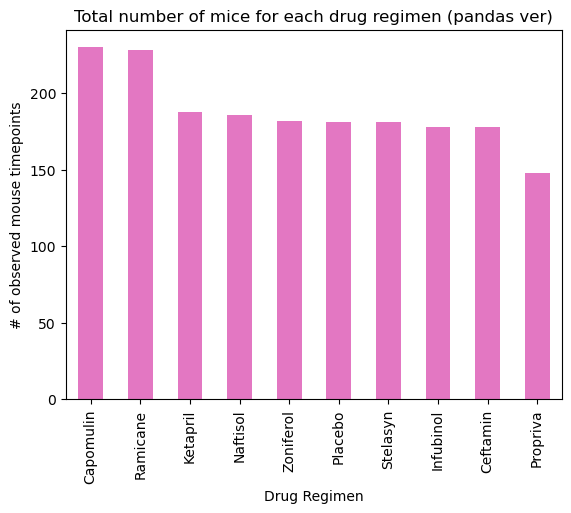

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = clean_mouse_data["Drug Regimen"].value_counts()

plot_pandas_ver = mouse_count.plot.bar(color="tab:pink")

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.title("Total number of mice for each drug regimen (pandas ver)")

plt.show()


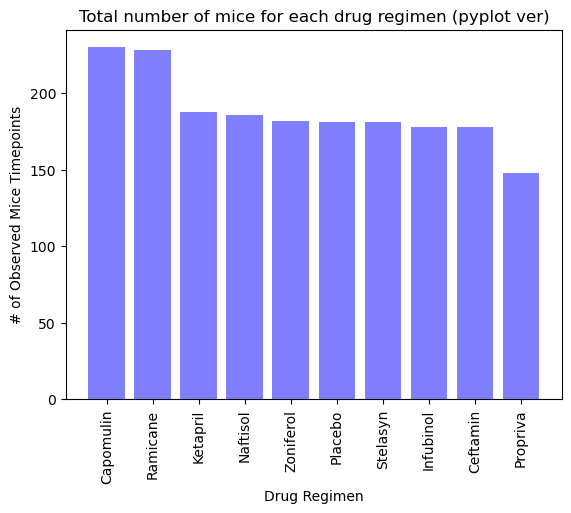

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis, y_axis, color="b", alpha=0.5, align = "center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.xticks(rotation="vertical")
plt.title("Total number of mice for each drug regimen (pyplot ver)")

plt.show()


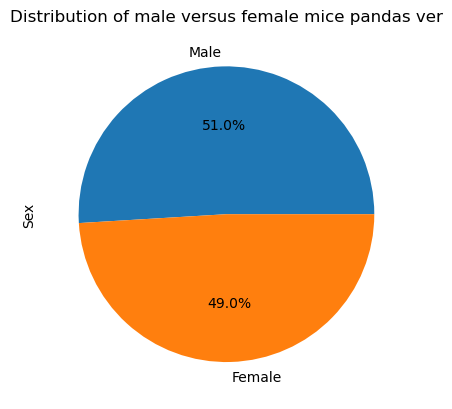

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_data = clean_mouse_data["Sex"].value_counts()
mouse_gender_data.plot.pie(autopct="%1.1f%%")

plt.title("Distribution of male versus female mice pandas ver")
plt.show()

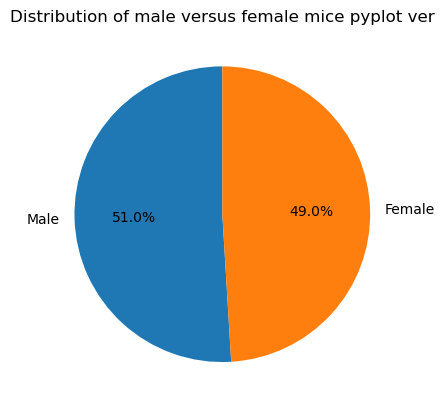

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender_data = clean_mouse_data["Sex"].value_counts()

plt.pie(mouse_gender_data, labels=mouse_gender_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of male versus female mice pyplot ver")

plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# firstly find the greatest timepoint

greatest_timepoint_df = pd.DataFrame(clean_mouse_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
greatest_timepoint_df
merged_df = pd.merge(clean_mouse_data, greatest_timepoint_df, on = "Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [98]:
# Create empty list to fill with tumor vol data (for plotting)
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

for drug in drugs:
    temp_df = merged_df.loc[merged_df["Drug Regimen"]==drug]
    
    final_volume_df = temp_df.loc[temp_df["Timepoint"]==temp_df["max_timepoint"]]
    values = final_volume_df["Tumor Volume (mm3)"]
    drug_values.append(values)
    
    #interquartile calculations
    
    quartiles = values.quantile([0.25, 0.5, 0.75]).round(2)
    lower_quartile = quartiles [0.25].round(2)
    upper_quartile = quartiles [0.75].round(2)
    iqr = round(upper_quartile - lower_quartile,2)
    print(f" IQR for {drug}: {iqr}")
    
    #calculate upper and lower bounds to identify outliers
    lower_bound = round(lower_quartile - (1.5 * iqr),2)
    upper_bound = round(upper_quartile + (1.5 * iqr),2)
    print(f"lower bound for {drug}: {lower_bound}") 
    print(f"upper bound for {drug}: {upper_bound}")
          
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f"number of {drug} outliers: {outliers_count}")
    

 IQR for Capomulin: 7.78
lower bound for Capomulin: 20.71
upper bound for Capomulin: 51.83
number of Capomulin outliers: 0
 IQR for Ramicane: 9.1
lower bound for Ramicane: 17.91
upper bound for Ramicane: 54.31
number of Ramicane outliers: 0
 IQR for Infubinol: 11.48
lower bound for Infubinol: 36.83
upper bound for Infubinol: 82.75
number of Infubinol outliers: 1
 IQR for Ceftamin: 15.58
lower bound for Ceftamin: 25.35
upper bound for Ceftamin: 87.67
number of Ceftamin outliers: 0


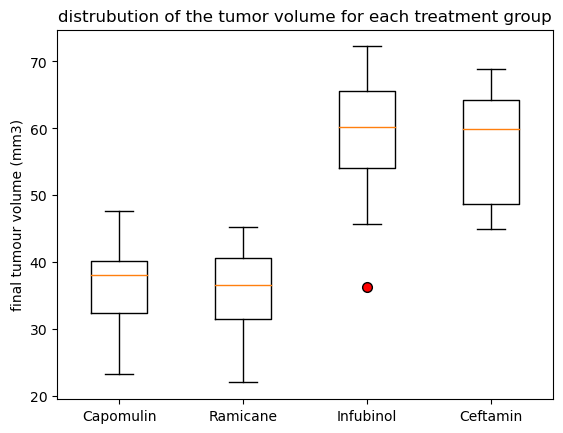

In [115]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 7, markeredgecolor = "black")
plt.boxplot(drug_values, flierprops=flierprops)

plt.title("distrubution of the tumor volume for each treatment group")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("final tumour volume (mm3)")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

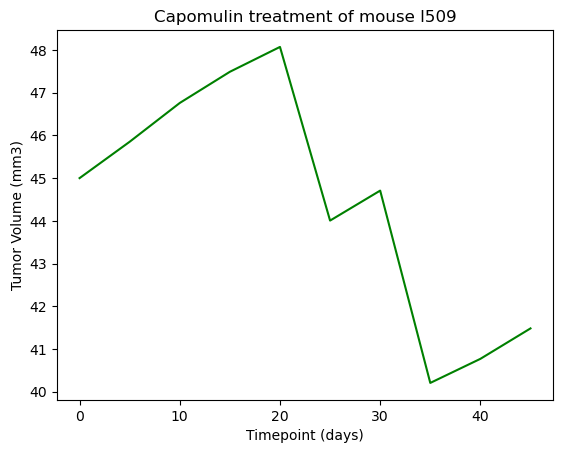

In [137]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
y_axis = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, y_axis, linewidth=1.5,color="green")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

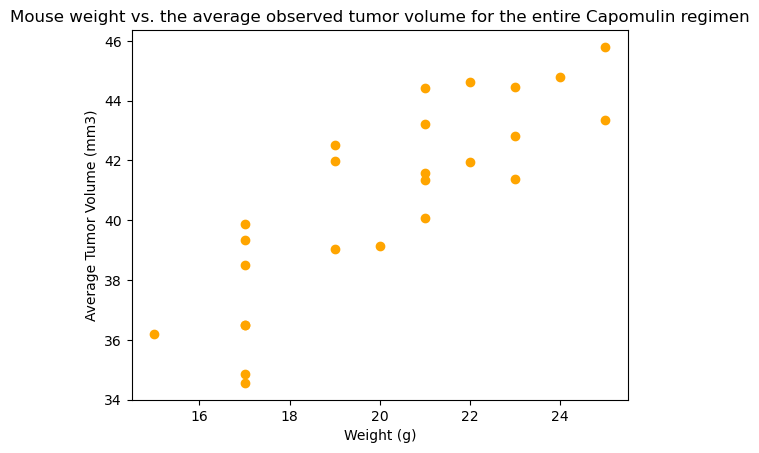

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()

average_capomulin_vol = capomulin_df.groupby(["Mouse ID"]).mean(numeric_only=True)

marker_size = 10 

plt.scatter(average_capomulin_vol["Weight (g)"], average_capomulin_vol["Tumor Volume (mm3)"], color = "orange")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volumes is 0.84


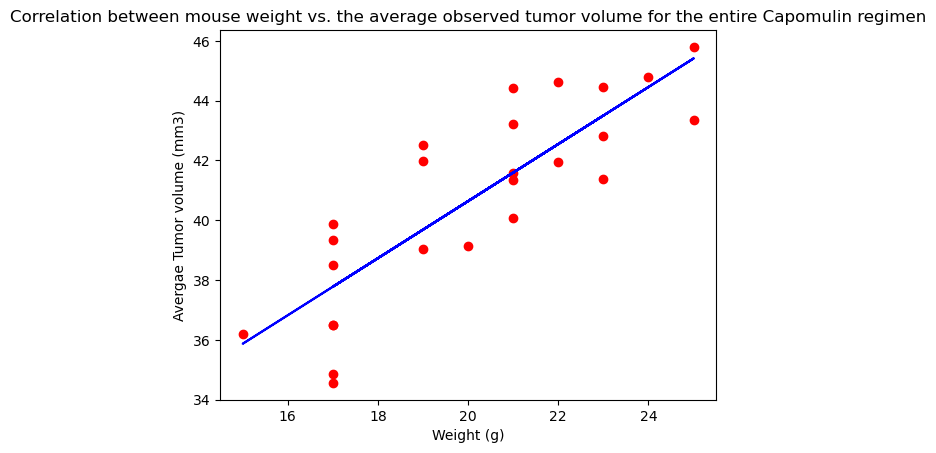

In [145]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(average_capomulin_vol["Weight (g)"],average_capomulin_vol["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volumes is {round(correlation[0],2)}")

#slope, y intercept, r value, p value, standard error 
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_capomulin_vol["Weight (g)"],average_capomulin_vol["Tumor Volume (mm3)"])
regress_values=average_capomulin_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(average_capomulin_vol["Weight (g)"], average_capomulin_vol["Tumor Volume (mm3)"], color = "red")
plt.plot(average_capomulin_vol["Weight (g)"],regress_values, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Avergae Tumor volume (mm3)")
plt.title("Correlation between mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")

plt.show()
